____

# **Movie Recommender Systems (Simple & Advanced)**
____

Welcome to the code notebook for Recommender Systems with Python. In this project we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

Let's get started!

**Import libraries**

In [1]:
import numpy as np
import pandas as pd

### Get the data

In [2]:
# Create columns for the dataframe
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [3]:
# Create a dataframe
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [4]:
# Check our dataframe
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


**Now let's get the movie titles**

In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [6]:
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


**We can merge them together**

In [7]:
df1 = pd.merge(df, movie_titles, on='item_id')

In [8]:
df1

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## EDA (Exploratory Data Analysis)

Let's explore the data a bit and get a look at some of the best rated movies.

**Import some visualization libraries**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Let's create a ratings dataframe with average rating and number of ratings:**

In [10]:
# Arrange movies in descending order according to their average ratings.
df1.groupby('title')['rating'].mean().sort_values(ascending=False)

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
# Arrange movies in descending order according to their number of ratings.
df1.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [12]:
# Now create a dataframe for ratings
ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())

In [13]:
# Check our dataframe
ratings

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [14]:
# Now add a column of 'number of ratings' in our 'ratings' dataframe.
ratings['number of ratings'] = pd.DataFrame(df1.groupby('title')['rating'].count())

In [15]:
# Now check our dataframe
ratings

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [16]:
# Set the style
sns.set_style('whitegrid')

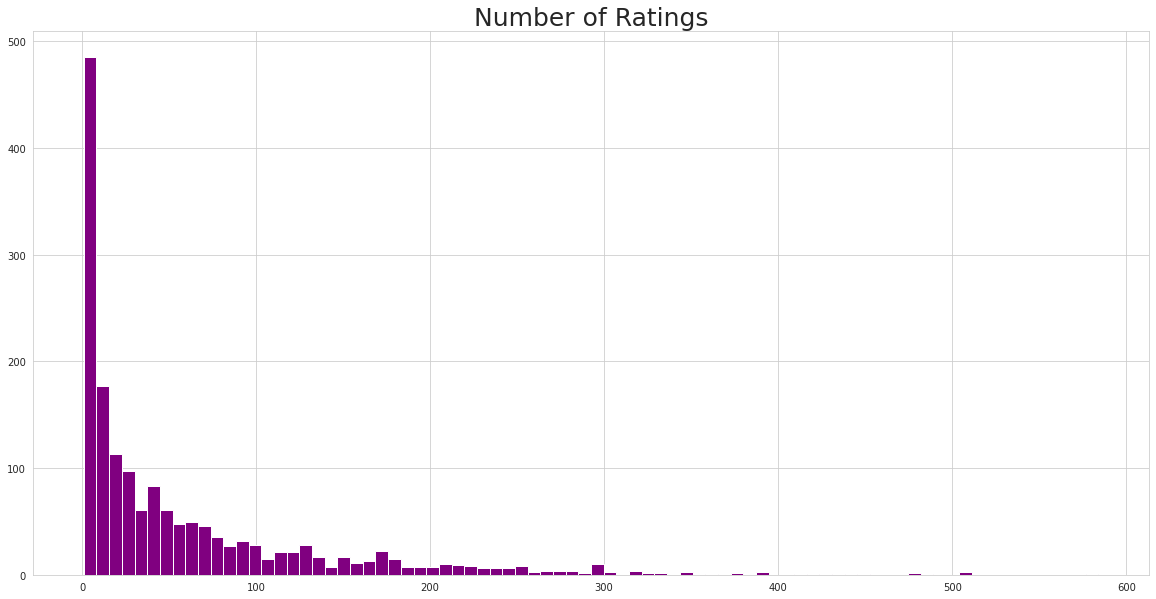

In [17]:
# Plot the histogram of the number of ratings
plt.figure(figsize=(20,10))
plt.title('Number of Ratings', size=25)
ratings['number of ratings'].hist(bins=80, color='purple')

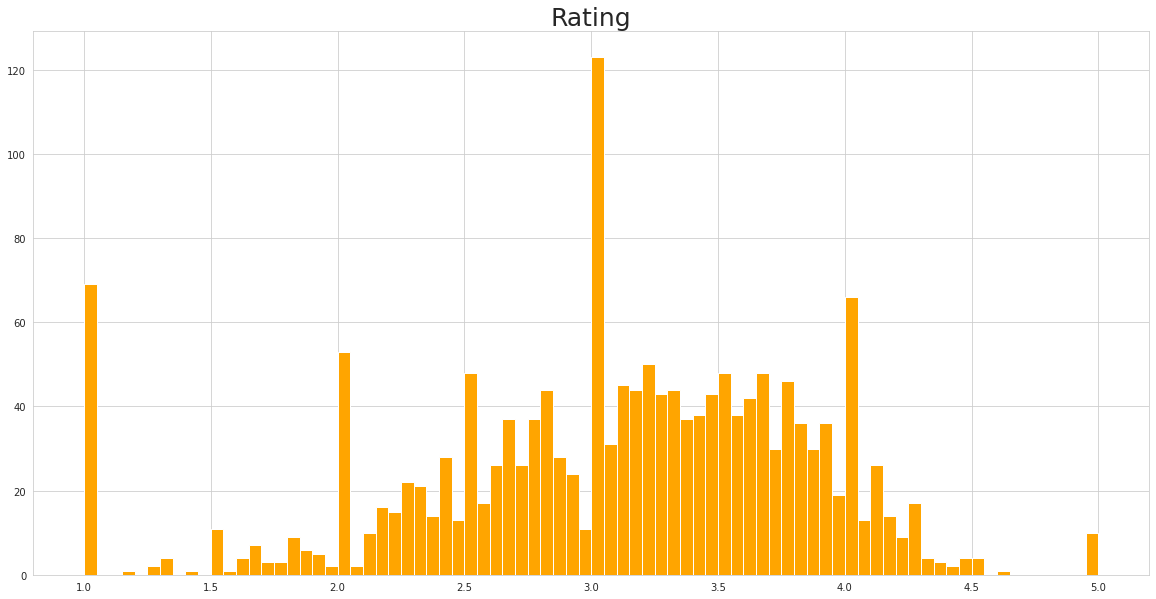

In [18]:
# Plot the histogram of the rating
plt.figure(figsize=(20,10))
plt.title('Rating', size=25)
ratings['rating'].hist(bins=80, color='orange')

* **Here we can see that most of the movies are distributed of a little bit normally arround rating 3 and 3.5**
* **Here we can also see that very few people have watched movies with rating 5.** 

### **Now check the distribution or relationship between the actual average rating and the number of ratings.**

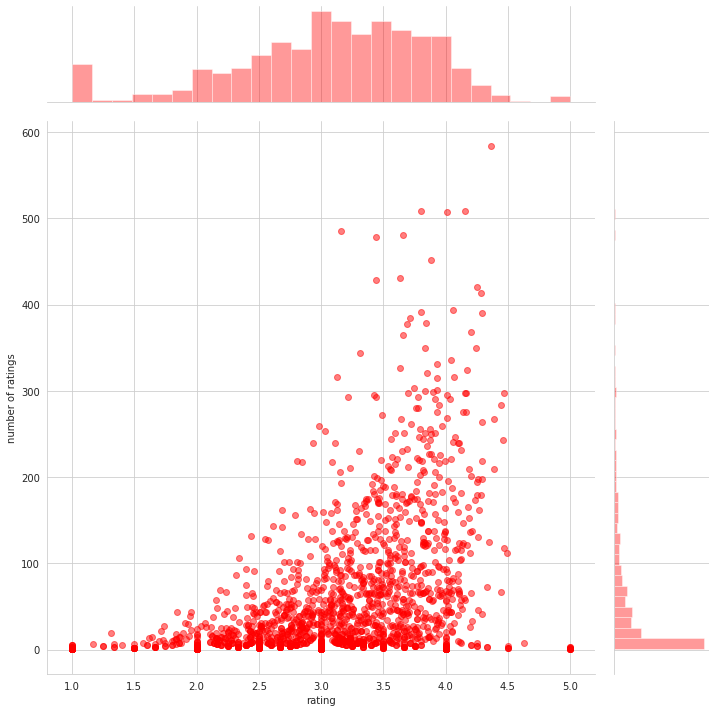

In [19]:
sns.jointplot(x='rating', y='number of ratings', data=ratings, height=10, color='red', alpha=0.5)

**Above plot shows, more reviews more rating, which makes a sense.**

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## **Recommending Similar Movies**

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [20]:
df1.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [21]:
moviemat = df1.pivot_table(index='user_id', columns='title', values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Check out Most rated movies:**

In [22]:
ratings.sort_values('number of ratings',ascending=False)

,rating,number of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


**Let's choose two movies: starwars, a sci-fi movie. And Liar Liar, a comedy.**

In [23]:
ratings.head()

,rating,number of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [24]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [25]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [26]:
liarliar_user_ratings

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

**We can then use corrwith() method to get correlations between two pandas series:**

In [27]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

/home/manish/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/manish/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Here is the correlation of every other movie to that specific user behaviour on the Star Wars movie.

In [28]:
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

Here is the correlation of every other movie to that specific user behaviour on the Liar Liar movie.

In [29]:
similar_to_liarliar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

**Let's clean this by removing NaN values and using a DataFrame instead of a series:**

In [30]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [31]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [32]:
# Drop NaN from dataframe
corr_starwars.dropna(inplace=True)

In [33]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [34]:
corr_starwars.sort_values('Correlation', ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
For Ever Mozart (1996),-1.0
Frankie Starlight (1995),-1.0
I Like It Like That (1994),-1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [35]:
# Join the number of ratings to the corr_starwars
# Here we have title index in both dataframes (ratings & corrcorr_starwars), so here we use join method
corr_starwars = corr_starwars.join(ratings['number of ratings'])

In [36]:
corr_starwars

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


**Now sort the values and notice how the titles make a lot more sense:**

In [37]:
# Now we have filter out all those movies which have number of ratings < 100
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation', ascending=False)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [38]:
# Now check movies which are highly correlated to the 'Star Wars (1977)' movie.
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation', ascending=False).head(4)

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420


Now the same for the comedy Liar Liar:

In [39]:
corr_liarliar = pd.DataFrame(similar_to_liarliar,columns=['Correlation'])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings['number of ratings'])
corr_liarliar[corr_liarliar['number of ratings']>100].sort_values('Correlation',ascending=False)

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
...,...,...
Hoop Dreams (1994),-0.184503,117
Ed Wood (1994),-0.199481,133
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),-0.238092,194


In [40]:
# Now check movies which are highly correlated to the 'Liar Liar (1997)' movie.
corr_liarliar[corr_liarliar['number of ratings']>100].sort_values('Correlation',ascending=False).head(3)

,Correlation,number of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129


**Many times these recommendation systems really popular movies are really popular items tend to be recommended to other people who also like another really popular item.**
____

# **Advanced Recommender Systems using Python**

Welcome to the code notebook for creating Advanced Recommender Systems with Python. The level of mathematics used in this project is very high and the heavy use of SciPy here.

Recommendation Systems usually rely on larger data sets and specifically need to be organized in a particular fashion. Because of this, we won't have a project to go along with this topic, instead we will have a more intensive walkthrough process on creating a recommendation system with Python with the same Movie Lens Data Set.

*Note: The actual mathematics behind recommender systems is pretty heavy in Linear Algebra.*
___

## Methods Used

Two most common types of recommender systems are **Content-Based** and **Collaborative Filtering (CF)**. 

* Collaborative filtering produces recommendations based on the knowledge of users’ attitude to items, that is it uses the "wisdom of the crowd" to recommend items. 
* Content-based recommender systems focus on the attributes of the items and give you recommendations based on the similarity between them.

## Collaborative Filtering

In general, Collaborative filtering (CF) is more commonly used than content-based systems because it usually gives better results and is relatively easy to understand (from an overall implementation perspective). The algorithm has the ability to do feature learning on its own, which means that it can start to learn for itself what features to use. 

CF can be divided into **Memory-Based Collaborative Filtering** and **Model-Based Collaborative filtering**. 

In this project, we will implement Model-Based CF by using singular value decomposition (SVD) and Memory-Based CF by computing cosine similarity. 

## The Data

We will use famous MovieLens dataset, which is one of the most common datasets used when implementing and testing recommender engines. It contains 100k movie ratings from 943 users and a selection of 1682 movies.

You can download the dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k.zip) or just use the u.data file that is already included in this folder.

We can then read in the **u.data** file, which contains the full dataset. You can read a brief description of the dataset [here](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt).

Note how we specify the separator argument for a Tab separated file.

____

## Getting Started

In [41]:
# Let's take a look of our datafram
df1

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


Now let's take a quick look at the number of unique users and movies.

In [42]:
n_users = df1.user_id.nunique()
n_items = df1.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_items))

Num. of Users: 944
Num of Movies: 1682


## Train Test Split

Recommendation Systems by their very nature are very difficult to evaluate, but we will evaluate them in this project. In order to do this, we'll split our data into two sets. However, we won't do our classic X_train,X_test,y_train,y_test split. Instead we can actually just segement the data into two sets of data:

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_data, test_data = train_test_split(df1, test_size=0.25)

## Memory-Based Collaborative Filtering

Memory-Based Collaborative Filtering approaches can be divided into two main sections: **user-item filtering** and **item-item filtering**. 

A *user-item filtering* will take a particular user, find users that are similar to that user based on similarity of ratings, and recommend items that those similar users liked. 

In contrast, *item-item filtering* will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and outputs other items as recommendations. 

* *Item-Item Collaborative Filtering*: “Users who liked this item also liked …”
* *User-Item Collaborative Filtering*: “Users who are similar to you also liked …”

In both cases, you create a user-item matrix which built from the entire dataset.

Since we have split the data into testing and training we will need to create two ``[943 x 1682]`` matrices (all users by all movies). 

The training matrix contains 75% of the ratings and the testing matrix contains 25% of the ratings.  

A distance metric commonly used in recommender systems is *cosine similarity*, where the ratings are seen as vectors in ``n``-dimensional space and the similarity is calculated based on the angle between these vectors. 
Cosine similiarity for users *a* and *m* can be calculated using the formula below, where you take dot product of  the user vector *$u_k$* and the user vector *$u_a$* and divide it by multiplication of the Euclidean lengths of the vectors.
<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(u_k,u_a)=\frac{u_k&space;\cdot&space;u_a&space;}{&space;\left&space;\|&space;u_k&space;\right&space;\|&space;\left&space;\|&space;u_a&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{k,m}x_{a,m}}{\sqrt{\sum&space;x_{k,m}^2\sum&space;x_{a,m}^2}}"/>

To calculate similarity between items *m* and *b* you use the formula:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?s_u^{cos}(i_m,i_b)=\frac{i_m&space;\cdot&space;i_b&space;}{&space;\left&space;\|&space;i_m&space;\right&space;\|&space;\left&space;\|&space;i_b&space;\right&space;\|&space;}&space;=\frac{\sum&space;x_{a,m}x_{a,b}}{\sqrt{\sum&space;x_{a,m}^2\sum&space;x_{a,b}^2}}
"/>  

Your first step will be to create the user-item matrix. Since you have both testing and training data you need to create two matrices.

In [45]:
#Create two user-item matrices, one for training and another for testing

train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]  

test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

You can use the [pairwise_distances](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html) function from sklearn to calculate the cosine similarity. Note, the output will range from 0 to 1 since the ratings are all positive.

In [46]:
from sklearn.metrics.pairwise import pairwise_distances

In [47]:
user_similarity = pairwise_distances(train_data_matrix, metric='cosine')
item_similarity = pairwise_distances(train_data_matrix.T, metric='cosine')

Next step is to make predictions. You have already created similarity matrices: `user_similarity` and `item_similarity` and therefore you can make a prediction by applying following formula for user-based CF:

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\bar{x}_{k}&space;&plus;&space;\frac{\sum\limits_{u_a}&space;sim_u(u_k,&space;u_a)&space;(x_{a,m}&space;-&space;\bar{x_{u_a}})}{\sum\limits_{u_a}|sim_u(u_k,&space;u_a)|}"/>

You can look at the similarity between users *k* and *a* as weights that are multiplied by the ratings of a similar user *a* (corrected for the average rating of that user). You will need to normalize it so that the ratings stay between 1 and 5 and, as a final step, sum the average ratings for the user that you are trying to predict. 

The idea here is that some users may tend always to give high or low ratings to all movies. The relative difference in the ratings that these users give is more important than the absolute values. To give an example: suppose, user *k* gives 4 stars to his favourite movies and 3 stars to all other good movies. Suppose now that another user *t* rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over with 3 stars. These two users could have a very similar taste but treat the rating system differently. 

When making a prediction for item-based CF you don't need to correct for users average rating since query user itself is used to do predictions.

<img class="aligncenter size-thumbnail img-responsive" src="https://latex.codecogs.com/gif.latex?\hat{x}_{k,m}&space;=&space;\frac{\sum\limits_{i_b}&space;sim_i(i_m,&space;i_b)&space;(x_{k,b})&space;}{\sum\limits_{i_b}|sim_i(i_m,&space;i_b)|}"/>

In [48]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis]) 
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])     
    return pred

In [49]:
item_prediction = predict(train_data_matrix, item_similarity, type='item')
user_prediction = predict(train_data_matrix, user_similarity, type='user')

### Evaluation
There are many evaluation metrics but one of the most popular metric used to evaluate accuracy of predicted ratings is *Root Mean Squared Error (RMSE)*. 
<img src="https://latex.codecogs.com/gif.latex?RMSE&space;=\sqrt{\frac{1}{N}&space;\sum&space;(x_i&space;-\hat{x_i})^2}" title="RMSE =\sqrt{\frac{1}{N} \sum (x_i -\hat{x_i})^2}" />

You can use the [mean_square_error](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) function from `sklearn`, where the RMSE is just the square root of MSE. To read more about different evaluation metrics you can take a look at [this article](http://research.microsoft.com/pubs/115396/EvaluationMetrics.TR.pdf). 

Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements in the prediction matrix with `prediction[ground_truth.nonzero()]`. 

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [51]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 3.132534830462438
Item-based CF RMSE: 3.46066046512543


Memory-based algorithms are easy to implement and produce reasonable prediction quality. 
The drawback of memory-based CF is that it doesn't scale to real-world scenarios and doesn't address the well-known cold-start problem, that is when new user or new item enters the system. Model-based CF methods are scalable and can deal with higher sparsity level than memory-based models, but also suffer when new users or items that don't have any ratings enter the system. I would like to thank Ethan Rosenthal for his [post](http://blog.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/) about Memory-Based Collaborative Filtering. 
____

# Model-based Collaborative Filtering

Model-based Collaborative Filtering is based on **matrix factorization (MF)** which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF. The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items. 
When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization you can restructure the  user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector. You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

Let's calculate the sparsity level of MovieLens dataset:

In [52]:
sparsity=round(1.0-len(df)/float(n_users*n_items),3)
print('The sparsity level of MovieLens 100K is ' +  str(sparsity*100) + '%')

The sparsity level of MovieLens 100K is 93.7%


To give an example of the learned latent preferences of the users and items: let's say for the MovieLens dataset you have the following information: _(user id, age, location, gender, movie id, director, actor, language, year, rating)_. By applying matrix factorization the model learns that important user features are _age group (under 10, 10-18, 18-30, 30-90)_, _location_ and _gender_, and for movie features it learns that _decade_, _director_ and _actor_ are most important. Now if you look into the information you have stored, there is no such feature as the _decade_, but the model can learn on its own. The important aspect is that the CF model only uses data (user_id, movie_id, rating) to learn the latent features. If there is little data available model-based CF model will predict poorly, since it will be more difficult to learn the latent features. 

Models that use both ratings and content features are called **Hybrid Recommender Systems** where both Collaborative Filtering and Content-based Models are combined. Hybrid recommender systems usually show higher accuracy than Collaborative Filtering or Content-based Models on their own: they are capable to address the cold-start problem better since if you don't have any ratings for a user or an item you could use the metadata from the user or item to make a prediction. 
____

## **SVD**
A well-known matrix factorization method is **Singular value decomposition (SVD)**. Collaborative Filtering can be formulated by approximating a matrix `X` by using singular value decomposition. The winning team at the Netflix Prize competition used SVD matrix factorization models to produce product recommendations, for more information I recommend to read articles: [Netflix Recommendations: Beyond the 5 stars](http://techblog.netflix.com/2012/04/netflix-recommendations-beyond-5-stars.html) and [Netflix Prize and SVD](http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-gower-netflix-SVD.pdf).
The general equation can be expressed as follows:
<img src="https://latex.codecogs.com/gif.latex?X=USV^T" title="X=USV^T" />


Given `m x n` matrix `X`:
* *`U`* is an *`(m x r)`* orthogonal matrix
* *`S`* is an *`(r x r)`* diagonal matrix with non-negative real numbers on the diagonal
* *V^T* is an *`(r x n)`* orthogonal matrix

Elements on the diagnoal in `S` are known as *singular values of `X`*. 


Matrix *`X`* can be factorized to *`U`*, *`S`* and *`V`*. The *`U`* matrix represents the feature vectors corresponding to the users in the hidden feature space and the *`V`* matrix represents the feature vectors corresponding to the items in the hidden feature space.
<img class="aligncenter size-thumbnail img-responsive" style="max-width:100%; width: 50%; max-width: none" src="http://s33.postimg.org/kwgsb5g1b/BLOG_CCA_5.png"/>

Now you can make a prediction by taking dot product of *`U`*, *`S`* and *`V^T`*.
____

In [53]:
# Import SciPy and SVD
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [54]:
# Get SVD components from train matrix. Choose k.

u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

User-based CF MSE: 2.7193300785610797


____

Carelessly addressing only the relatively few known entries is highly prone to overfitting. SVD can be very slow and computationally expensive. More recent work minimizes the squared error by applying alternating least square or stochastic gradient descent and uses regularization terms to prevent overfitting. Alternating least square and stochastic gradient descent methods for CF will be covered in the next tutorials.
____

### **Review**:

* We have covered how to implement simple **Collaborative Filtering** methods, both memory-based CF and model-based CF.
* **Memory-based models** are based on similarity between items or users, where we use cosine-similarity.
* **Model-based CF** is based on matrix factorization where we use SVD to factorize the matrix.
* Building recommender systems that perform well in cold-start scenarios (where little data is available on new users and items) remains a challenge. The standard collaborative filtering method performs poorly is such settings. 

## Looking for more?

* If you want to tackle your own recommendation system analysis, check out these data sets.
* **Note:** The files are quite large in most cases, not all the links may stay up to host the data, but the majority of them still work. Or just Google for your own data set!

**Movies Recommendation:**

MovieLens - Movie Recommendation Data Sets http://www.grouplens.org/node/73

Yahoo! - Movie, Music, and Images Ratings Data Sets http://webscope.sandbox.yahoo.com/catalog.php?datatype=r

Jester - Movie Ratings Data Sets (Collaborative Filtering Dataset) http://www.ieor.berkeley.edu/~goldberg/jester-data/

Cornell University - Movie-review data for use in sentiment-analysis experiments http://www.cs.cornell.edu/people/pabo/movie-review-data/

**Music Recommendation:**

Last.fm - Music Recommendation Data Sets http://www.dtic.upf.edu/~ocelma/MusicRecommendationDataset/index.html

Yahoo! - Movie, Music, and Images Ratings Data Sets http://webscope.sandbox.yahoo.com/catalog.php?datatype=r

Audioscrobbler - Music Recommendation Data Sets http://www-etud.iro.umontreal.ca/~bergstrj/audioscrobbler_data.html

Amazon - Audio CD recommendations http://131.193.40.52/data/

**Books Recommendation:**

Institut für Informatik, Universität Freiburg - Book Ratings Data Sets http://www.informatik.uni-freiburg.de/~cziegler/BX/
Food Recommendation:

Chicago Entree - Food Ratings Data Sets http://archive.ics.uci.edu/ml/datasets/Entree+Chicago+Recommendation+Data
Merchandise Recommendation:

**Healthcare Recommendation:**

Nursing Home - Provider Ratings Data Set http://data.medicare.gov/dataset/Nursing-Home-Compare-Provider-Ratings/mufm-vy8d

Hospital Ratings - Survey of Patients Hospital Experiences http://data.medicare.gov/dataset/Survey-of-Patients-Hospital-Experiences-HCAHPS-/rj76-22dk

**Dating Recommendation:**

www.libimseti.cz - Dating website recommendation (collaborative filtering) http://www.occamslab.com/petricek/data/
Scholarly Paper Recommendation:

National University of Singapore - Scholarly Paper Recommendation http://www.comp.nus.edu.sg/~sugiyama/SchPaperRecData.html

# Great Job !
____